# Students Score Prediction (Simple Linear Regression)

The aim is to build a model which predicts scores on a module based on the hours the student spent studying the module.

# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 1 - Collect data from various source(s)

### Read data from the csv file

In [3]:
df = pd.read_csv('data/student_scores.csv')

### Let's check what we have in the csv file

We can use ```shape``` property from **Pandas's Data frame**<br/>
I will return a tuple representing the dimensionality of the DataFrame.

In [4]:
df.shape

(32, 6)

### Let's view some data from the CSV 

We can use **Pandas** ```head()``` or ```tail()``` method. <br>
The head method will return the first 5 rows from the dataframe.
The tail method will return the last 5 rows from the dataframe.

In [5]:
df.head()

,Name,Email,Gender,Age,Hours,Scores
0,Gilbert,gilbert_j_20@yahoo.com,Male,21,2.5,21.0
1,Jorge,jorge_89@gmail.com,Male,21,5.1,47.0
2,Olivia,olivia_21@yahoo.com,Female,21,3.2,27.0
3,Brian,brian@yahoo.com,Male,21,8.5,75.0
4,Roberto,roberto90@gmail.com,Male,21,3.5,30.0


# Step 2 - Data cleaning & Feature Engineering 

**Feature engineering** is the process of selecting, manipulating, and transforming raw data into features <br>
that can be used in supervised learning.

### Step 2.1 - Imputation

Missing values have an impact on the performance of machine learning models for whatever cause. <br>
The main goal of **imputation** is to handle these missing values.
<br>

**Numerical Imputation**
<br>

Numerical imputation is used to fill gaps in datasets when certain pieces of numerical information are missing. <br>
For an example : Age, Hours, Scores

**Categorical Imputation**
<br>

Categorical imputation is used to fill gaps in datasets when certain pieces of categorical information are missing. <br>
For an example : Gender


#### Step 2.1.1 - Numerical Imputation

Let's get the data type of each column of the dataframe

In [6]:
df.dtypes

Name       object
Email      object
Gender     object
Age         int64
Hours     float64
Scores    float64
dtype: object

As we can see here that the age, hours, and scores are the numeric columns in the dataframe.
<br>

Let's check whether the numeric columns have NULL values

In [7]:
# df.Age.isnull().sum()
# df.isnull()
# df.isnull().sum().sort_values(ascending = False)
df.iloc[:, 3:6].isnull().sum().sort_values(ascending = False)

Hours     2
Scores    2
Age       0
dtype: int64

As we can see that the hours and scores have 2 Null values in each and age doesn't have any null values
<br>
<br>
Let's view the rows where hours is Null

In [8]:
# df[df.iloc[:, 3:6].isna().any(axis=1)]
df[df.iloc[:, 4:5].isna().any(axis=1)]

,Name,Email,Gender,Age,Hours,Scores
18,Christopher,s.christopher_23@yahoo.com,Male,21,NaN,78.0
27,Walter,w.walter_23@rehlok.co.uk,Male,21,NaN,NaN


**For this example, rows which don’t have hours and scores are not necessary. So we can remove them and it won't impact our predictions** 
<br>

Let's remove the rows which don’t have hours and scores ( Row number 27) 

In [9]:
# df[df['Hours'].isnull() & df['Scores'].isnull()] # Select rows where Hours and Scores are NULL
#df.dropna()
#df.dropna(subset=['Hours', 'Scores'])
df = df.dropna(how='all', subset=['Hours', 'Scores'])
# df

Once again let's view the rows where hours is Null

In [10]:
df[df.iloc[:, 4:5].isna().any(axis=1)]

,Name,Email,Gender,Age,Hours,Scores
18,Christopher,s.christopher_23@yahoo.com,Male,21,NaN,78.0


Now we have only one row with a NULL value for hours and that has a valid score. <br> 
Dropping that row wouldn't be ideal and it may impact our prediction.<br> 
The best solution would be to replace the Null value by using the mean value of the hour's column.

In [11]:
df['Hours'].mean()
df['Hours'].fillna((df['Hours'].mean()), inplace=True)

Once again let's view the rows where hours is Null

In [12]:
df[df.iloc[:, 4:5].isna().any(axis=1)]

,Name,Email,Gender,Age,Hours,Scores


We have successfully cleaned the null values of hours column 💪

Once again, Let's check whether the numeric columns have NULL values

In [13]:
df.iloc[:, 3:6].isnull().sum().sort_values(ascending = False)

Scores    1
Age       0
Hours     0
dtype: int64

Now we have only one null value in scores. <br>
Let's view the rows where scores is Null

In [14]:
df[df.iloc[:, 5:6].isna().any(axis=1)]

,Name,Email,Gender,Age,Hours,Scores
12,Robin,i_robin_25@gmail.com,NaN,21,5.7,NaN


As we can see that the score is null, However it has a valid hours. 
So, let's replace the null with mean value of scores

In [15]:
df['Scores'].fillna((df['Scores'].mean()), inplace=True)

Once again, Let's check whether the numeric columns have NULL values

In [16]:
df.iloc[:, 3:6].isnull().sum().sort_values(ascending = False)

Age       0
Hours     0
Scores    0
dtype: int64

We have successfully cleaned the null values of the Scores column as well 💪 <br>
We don't have any more numeric columns with Null values

#### Step 02.1.2 - Categorical Imputation

Let's check whether the categorical columns (Gender) have NULL values

In [17]:
df.iloc[:, 2:3].isnull().sum().sort_values(ascending = False)

Gender    2
dtype: int64

Before we replace the NULL values on gender column, let's check what are the unique gender values we have in the dataset. 

In [18]:
df.Gender.unique()

array(['Male', 'Female', nan, 'Boy'], dtype=object)

We have Male, Female, nan, Boy values as gender. 
Let's get the count of each values

In [19]:
df['Gender'].value_counts()

Male      21
Female     7
Boy        1
Name: Gender, dtype: int64

When dealing with categorical columns, replacing missing values with the highest value in the column is a smart solution.

In [20]:
#df['Gender'].value_counts().idxmax()
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)

Once again, let's check whether the categorical columns (Gender) have NULL values

In [21]:
df.iloc[:, 2:3].isnull().sum().sort_values(ascending = False)

Gender    0
dtype: int64

We have successfully cleaned the null values of the gender column 💪

Now let's check whether we have NULL values on any other colums

In [22]:
df.iloc[:,:].isnull().sum().sort_values(ascending = False)

Name      1
Email     1
Gender    0
Age       0
Hours     0
Scores    0
dtype: int64

As we can see here that there are null values for Name and email.
However, these are not dominating values and replacing them with a value like “Other” would be a better choice.
So let's replace them with the value 'other'

In [23]:
df.fillna('Other', inplace=True)

Once again, let's check whether we have NULL values on any other colums

In [24]:
df.iloc[:,:].isnull().sum().sort_values(ascending = False)

Name      0
Email     0
Gender    0
Age       0
Hours     0
Scores    0
dtype: int64

We have successfully cleaned the null values from the dataframe. 💪

### Step 2.2 - Handling Outliers

An **outlier** is an observation that lies an abnormal distance from other values in a random sample from a population.

Many parametric statistics, like mean, correlations, and every statistic based on these is sensitive to outliers.

Since the assumptions of standard statistical procedures or models, such as linear regression and ANOVA also based on the parametric statistic, outliers can mess up your analysis

How could we detect it?

We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers

<ol>
<li>Boxplots</li>
<li>Z-score</li>
<li>Inter Quantile Range(IQR)</li>
</ol>

Let's use the Boxplots to detect the outlier.

<AxesSubplot:>

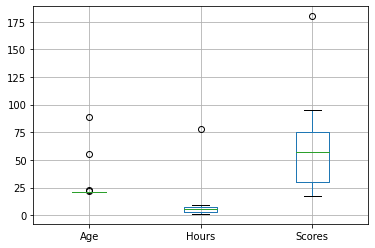

In [25]:
#df.boxplot(return_type='axes')
#df.boxplot(return_type='axes', column=['Age','Hours','Scores'])
#sns.set(style="whitegrid")
#sns.boxplot(data = df, palette="Set2", width=100)
#sns.boxplot(data=df)
#sns.boxplot(data=df, orient="h", palette="Set2")
df.boxplot(return_type='axes', column=['Age','Hours','Scores'])

<AxesSubplot:ylabel='Frequency'>

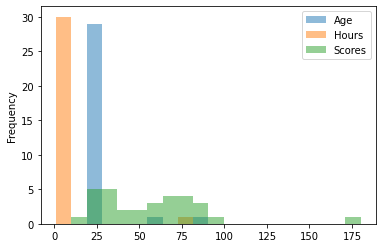

In [26]:
df.plot(kind='hist',alpha=0.5, bins=20)

In [27]:
# lets view some basic statistical details from the data
# We can use Pandas describe() method to view the statistical details
df.describe()

,Age,Hours,Scores
count,31.000000,31.000000,31.000000
mean,24.387097,7.583333,57.033333
std,13.452825,13.292155,32.998468
min,21.000000,1.100000,17.000000
25%,21.000000,3.250000,30.000000
50%,21.000000,5.500000,57.033333
75%,21.000000,7.641667,75.500000
max,89.000000,78.000000,180.000000


### Step 2.2.1 - Outlier Treatment

Let's use **quantile-based flooring and capping**

In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values and will remove those rows from the dataset.

**Hours**

From the above boxplot, we can see that there are some outliers for Hours which has the values closest 75. So, lets findout the 90th percentil for Hours and will remove the rows which are highere than the 90th percentil value

In [28]:
df['Hours'].quantile(0.90)

8.8

Remove all the rows from dataframe where Hours is greater than 8.620000000000001

In [29]:
df.drop(df[df['Hours'] >= df['Hours'].quantile(0.90)].index, inplace = True)

<AxesSubplot:>

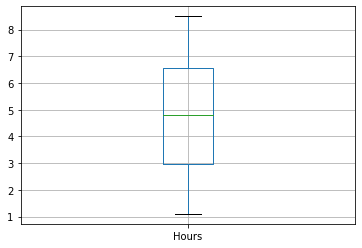

In [30]:
df.boxplot(return_type='axes',column=['Hours'])

We have successfully removed the Hours outliers from the dataframe 💪

Lets do the same for Scores and Age

**Scores**

In [31]:
df['Scores'].quantile(0.90)

79.2

In [32]:
df.drop(df[df['Hours'] >= df['Scores'].quantile(0.90)].index, inplace = True)

<AxesSubplot:>

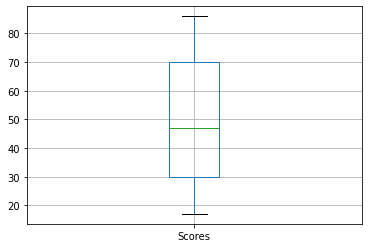

In [33]:
df.boxplot(return_type='axes',column=['Scores'])

**Age**

In [34]:
df['Age'].quantile(0.90)

21.800000000000004

In [35]:
df.drop(df[df['Age'] >= 22].index, inplace = True)

<AxesSubplot:>

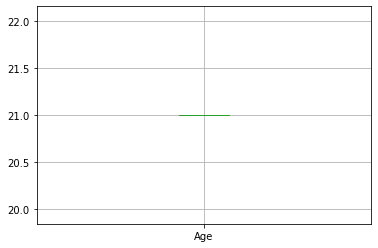

In [36]:
df.boxplot(return_type='axes',column=['Age'])

<AxesSubplot:>

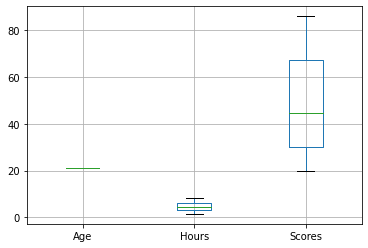

In [37]:
df.boxplot(return_type='axes', column=['Age','Hours','Scores'])

We have successfully removed the outliers from the dataframe 💪 with that, the step 2 completed.

# Step 3 - Model building and Selection of ML Algorithm

**What Is Model Selection?** <br>
Model selection is the process of choosing one of the models as the final model that addresses the problem. It involves/depends on below factors.<br>
<ol>
    <li>Input data type</li>
    <li>Output date type</li>
    </ol>
<br>
During this step we must train the model to understand the outcomes and test with same set of algorithms and compare the TRAIN and TEST outcomes (Actuals Vs Predicted)

### Step 3.1 - Preparing the Data

<br>
In this step, we should divide the data into "attributes" and "labels". 
<br>
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 
<br>
From our dataset we want to predict the percentage score depending upon the hours studied.
<br>
Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 
<br>

#### Step 3.1.1 - Extract the attributes and labels

In [38]:
X = df.iloc[:, 4:5].values # Hours
Y = df.iloc[:, 5:6].values # Score

#### Step 3.1.2 - Prepare training and test datasets

<br>
80% of the data to training set while 20% of the data to test set.

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Step 3.1.2 - Training the Algorithm

In [40]:
regression = LinearRegression()

# Train the model using the training sets
regression.fit(X_train, Y_train)

# Make predictions using the testing set
score_y_predict = regression.predict(X_test)

In [41]:
X_test, score_y_predict

(array([[5.9       ],
        [7.7       ],
        [6.9       ],
        [7.58333333],
        [4.8       ]]),
 array([[58.10322348],
        [75.15158673],
        [67.57453639],
        [74.04660022],
        [47.68477927]]))

##### Let's compare the actual output values for X_test with the predicted score values

In [42]:
mlr_compare = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': score_y_predict.flatten()})
mlr_compare

,Actual,Predicted
0,62.0,58.103223
1,85.0,75.151587
2,76.0,67.574536
3,78.0,74.046600
4,54.0,47.684779


##### Let's visualize comparison result as a bar graph

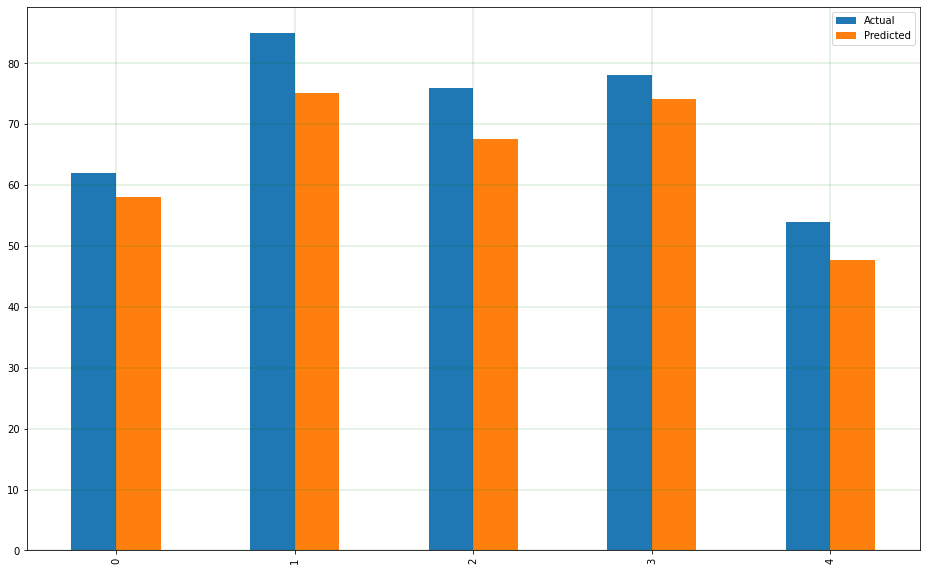

In [43]:
df1 = mlr_compare.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.show()

# Step 4 - Evaluate the Model


What metrics can we used for regression problems?

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors

**Mean Squared Error (MSE)** is the mean of the squared errors

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors

In [44]:
regression.coef_

array([[9.47131292]])

In [45]:
# The coefficients
print("Coefficients: \n", regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, score_y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, score_y_predict))

print('Mean Absolute Error:', mean_absolute_error(Y_test, score_y_predict))  
print('Mean Squared Error:', mean_squared_error(Y_test, score_y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, score_y_predict)))

Coefficients: 
 [[9.47131292]]
Mean squared error: 47.74
Coefficient of determination: 0.63
Mean Absolute Error: 6.487854783032911
Mean Squared Error: 47.73518619260313
Root Mean Squared Error: 6.90906550791083


In [47]:
regression.predict([[6]])

array([[59.05035477]])